<a href="https://colab.research.google.com/github/farhanasajeer/correlation-regression/blob/main/breastcanserCORR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('/content/drive/MyDrive/Breast_cancer_data.csv')

In [3]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
data.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

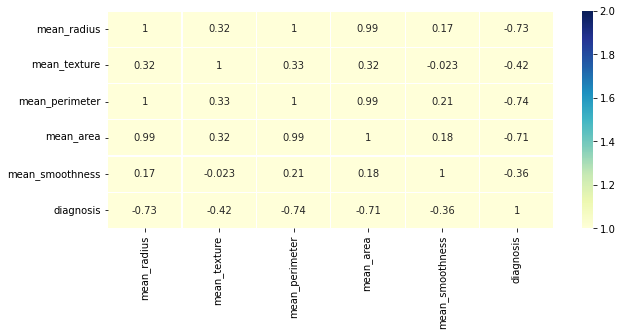

In [5]:
# find the correlation using corr function

corrmatrix=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix, vmin=2, vmax=1, annot=True,linewidths=0.2,cmap='YlGnBu')

In [6]:
x=data.drop('mean_texture',axis=1)
y=data['mean_texture']

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [9]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)

In [10]:
predictions=model.predict(x_test)

In [11]:
print(y_test)

204    18.60
70     21.31
131    19.48
431    17.68
540    14.44
       ...  
89     15.24
199    20.22
411    16.83
18     22.15
390    12.22
Name: mean_texture, Length: 143, dtype: float64


In [12]:
print(predictions)

[17.51614756 21.7874576  20.9666314  17.38209716 17.48722163 21.52302953
 21.57720981 21.37374969 16.63263831 19.18429713 17.6403129  22.02363965
 17.66548086 20.53116107 17.7872367  20.98632902 17.72752581 17.33243209
 16.53871748 21.87698453 21.63908857 17.08971175 20.71281959 18.56314036
 19.10768303 15.08138671 18.40533612 18.10920647 17.27873066 21.36209788
 17.69586397 17.4944958  16.82985668 17.42234659 16.98230736 17.41964431
 21.99332806 18.49846532 21.67332756 17.7875615  17.50827221 21.08828898
 16.923578   17.89451364 15.4505948  18.14474895 14.9867921  18.66978091
 17.23378878 19.18722106 21.18642954 21.74213491 18.02260934 15.25514148
 16.67494321 18.82010617 17.32479655 22.54866072 21.63653184 17.3543231
 17.31465538 20.76578342 20.49738306 19.00379055 18.02527122 18.80745489
 21.15231259 23.09325802 16.9732119  17.76610311 20.32678144 21.78471604
 18.13436796 22.05753831 18.89569255 16.6826744  17.43919617 20.9302098
 18.83444181 15.81210435 21.49256334 18.31580408 21.8

In [13]:
from sklearn.metrics import mean_squared_error
print('MSC is:',mean_squared_error(y_test,predictions))

MSC is: 15.286926698533254
